In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
print(tf.config.list_physical_devices("GPU"))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2022-02-12 13:36:25.179204: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-12 13:36:25.267832: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-12 13:36:25.268491: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [2]:
labels_csv=pd.read_csv("../input/dog-breed-identification/labels.csv")
labels_csv.describe()

id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126

In [3]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

<AxesSubplot:>

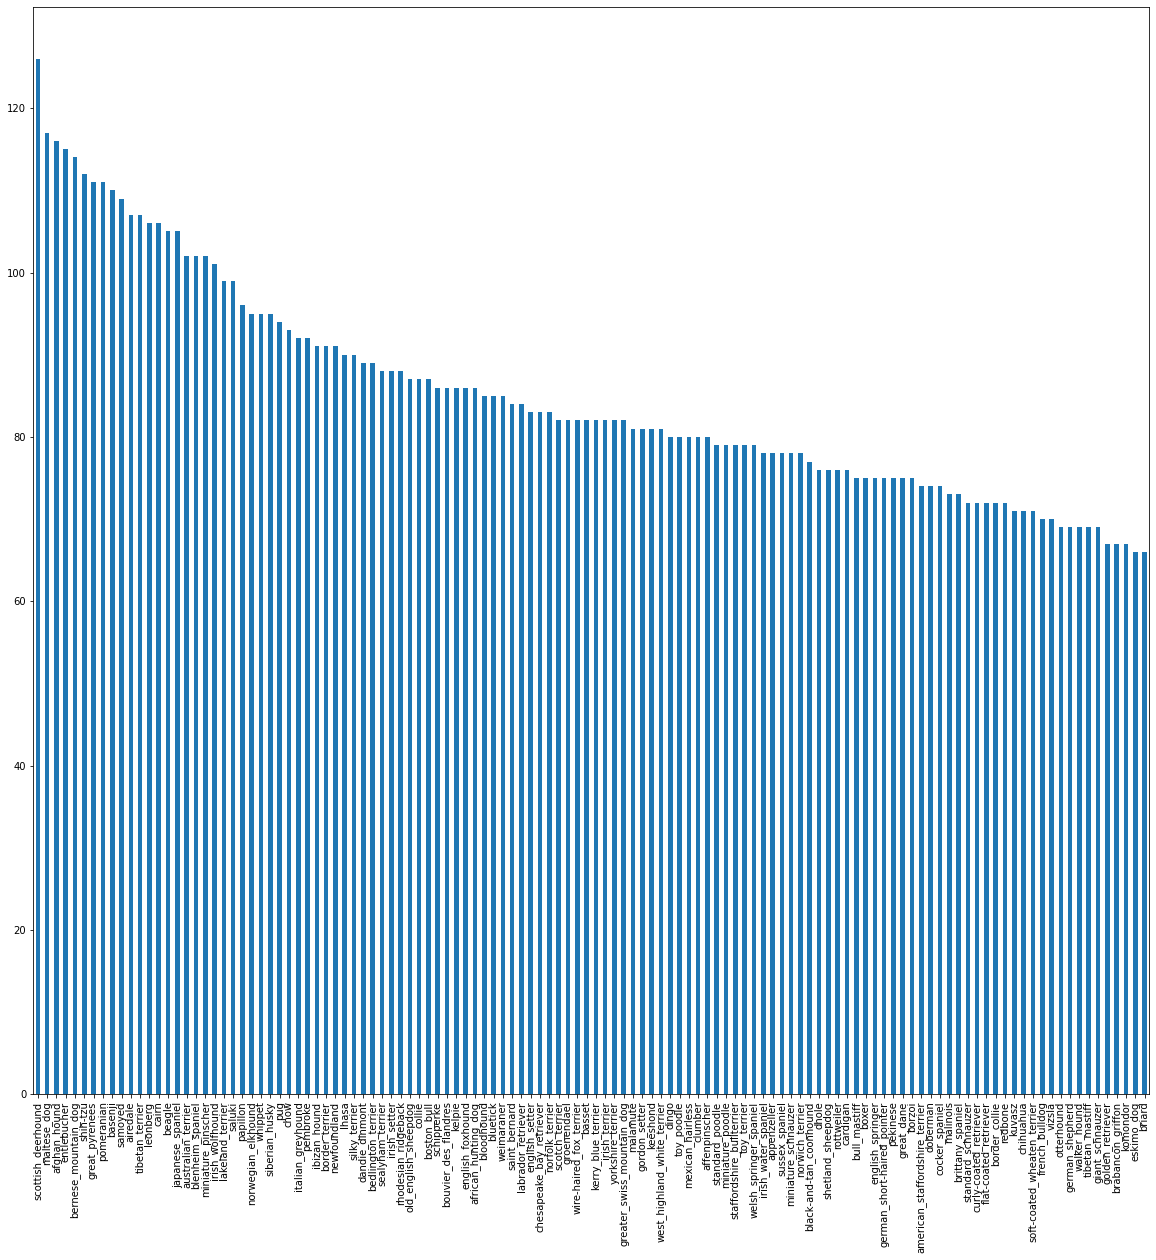

In [4]:
labels_csv["breed"].value_counts().plot.bar(figsize=(20,20))

In [5]:
filesname=["../input/dog-breed-identification/train/"+fname+".jpg" for fname in labels_csv["id"]]
filesname[:10]

['../input/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '../input/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '../input/dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '../input/dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '../input/dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '../input/dog-breed-identification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '../input/dog-breed-identification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '../input/dog-breed-identification/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '../input/dog-breed-identification/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '../input/dog-breed-identification/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

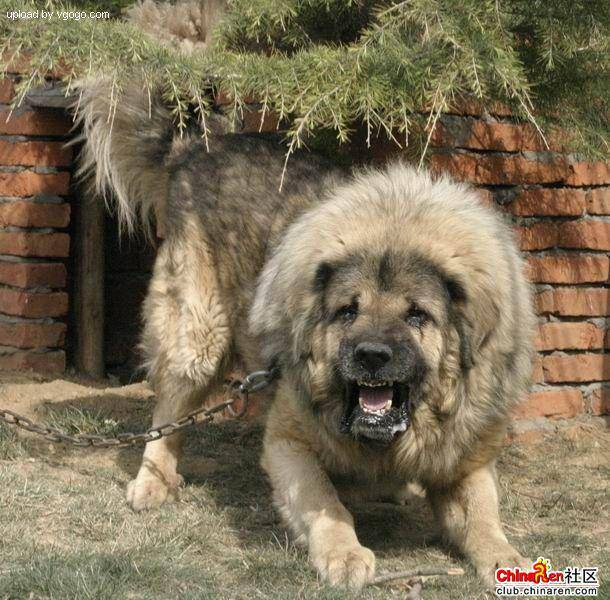

In [6]:
from IPython.display import Image
Image(filesname[9000])

In [7]:
labels_csv["breed"][9000]

'tibetan_mastiff'

In [8]:
labels=labels_csv["breed"].to_numpy()
unique_breeds=np.unique(labels)
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [9]:
boolean_labels=[label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [10]:
len(boolean_labels)

10222

In [11]:
print(labels[0])
print(np.where(unique_breeds==labels[0]))
print(boolean_labels[0].argmax())
print(boolean_labels[0].astype(int))

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [12]:
x=filesname
y=boolean_labels

In [13]:
y[:10]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [14]:
# Set Number to start off experimenting with ~1000 images and increase as needed
Num_images = 1000

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x[:Num_images],
                                               y[:Num_images],
                                              test_size=0.2,
                                              random_state=42)

In [17]:
len(x_train),len(x_test),len(y_train),len(y_test)

(800, 200, 800, 200)

## Preprocessing Images(turning images into Tensors)
  1. Take an image filepath as input
  2. Use Tensorflow to read the file and save it to a variable
  3. Turn our image(jpg) into tensors
  4. Resize the image to be a shape of (224,224)
  5. Return the modified image

In [18]:
from matplotlib.pyplot import imread
image = imread(filesname[42])
image.shape

(257, 350, 3)

In [19]:
image.max(),image.min()

(255, 0)

In [20]:
image[:2]

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)

In [21]:
tf.constant(image)[:2]

2022-02-12 13:36:29.745035: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-02-12 13:36:29.746196: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-12 13:36:29.747005: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-12 13:36:29.747697: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

In [22]:
# Define image size
Img_Size=224

# Create a function for preprocessing images
def process_image(image_path,img_size=Img_Size):
    """
    Takes an image file and turns the image into a tensor.
    """

    # Read in an image file
    image = tf.io.read_file(image_path)
    # Turn the jpeg image into numerical Tensor with 3 colour channels (red,green,blue)
    image = tf.image.decode_jpeg(image,channels=3)
    # Convert the colour channel values from 0-255 to 0-1 values
    image = tf.image.convert_image_dtype(image,tf.float32)
    # Resize the image to our desired value (224,224)
    image = tf.image.resize(image,size=[img_size,img_size])
    return image

In [23]:
tf.image.convert_image_dtype(image,tf.float32)

<tf.Tensor: shape=(257, 350, 3), dtype=float32, numpy=
array([[[0.34901962, 0.5372549 , 0.34117648],
        [0.29803923, 0.48627454, 0.2901961 ],
        [0.24705884, 0.43529415, 0.23137257],
        ...,
        [0.29803923, 0.5254902 , 0.3372549 ],
        [0.29803923, 0.5254902 , 0.3372549 ],
        [0.29803923, 0.5254902 , 0.3372549 ]],

       [[0.28235295, 0.4666667 , 0.28627452],
        [0.2627451 , 0.44705886, 0.26666668],
        [0.24705884, 0.43529415, 0.24705884],
        ...,
        [0.29411766, 0.5137255 , 0.32941177],
        [0.2901961 , 0.5176471 , 0.32941177],
        [0.2901961 , 0.5137255 , 0.3372549 ]],

       [[0.21960786, 0.40784317, 0.25882354],
        [0.227451  , 0.4156863 , 0.25882354],
        [0.2509804 , 0.43921572, 0.28235295],
        ...,
        [0.2784314 , 0.49803925, 0.32156864],
        [0.28627452, 0.5058824 , 0.32941177],
        [0.28627452, 0.50980395, 0.33333334]],

       ...,

       [[0.00784314, 0.04313726, 0.03921569],
        [0.01

## Turning our data in batches

In [24]:
# Create a simple function to return a tuple(image,label)
def get_image_label(image_path,label):
    image=process_image(image_path)
    return image,label

In [25]:
(process_image(x[42]),tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

In [26]:
# Define the batch size
batch_size=32

# Create a function to turn data into bactches
def create_data_batches(x,y=None,batch_size=batch_size,valid_data=False,test_data=False):
    # If the data is a test dataset, we probably don't have labels 
    if test_data:
        print("creating test data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # Only filesname (no labels)
        data_batch = data.map(process_image).batch(batch_size)
        return data_batch
    
    # If the data is a valid dataset, we don't need to suffle it
    elif valid_data:
        print("Creating validation data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y))) # x=filepaths,y=labels
        data_batch = data.map(get_image_label).batch(batch_size)
        return data_batch
    else:
        print("Creating training data batches...")
        # Turn filepath and labels into Tensors
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y)))
        # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
        data = data.shuffle(buffer_size=len(x))
        data = data.map(get_image_label)
        
        data_batch = data.batch(batch_size)
        return data_batch

In [27]:
# Creating training and validation data batches 
train_data = create_data_batches(x_train,y_train)
test_data = create_data_batches(x_test,y_test,valid_data=True)

Creating training data batches...
Creating validation data batches...


In [28]:
train_data.element_spec,test_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

# Visualizing Data Batches 
## Our data is now in batches, however these can be a little hard to understand/comprehend, let's visualize them!

In [29]:
# Create a function for viewing images in a data batch
def show25_images(images,labels):
    plt.figure(figsize=(20,20))
    for i in range(25):
        ax = plt.subplot(5,5,i+1)
        plt.imshow(images[i])
        plt.title(unique_breeds[labels[i].argmax()])

In [30]:
train_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

2022-02-12 13:36:33.821909: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


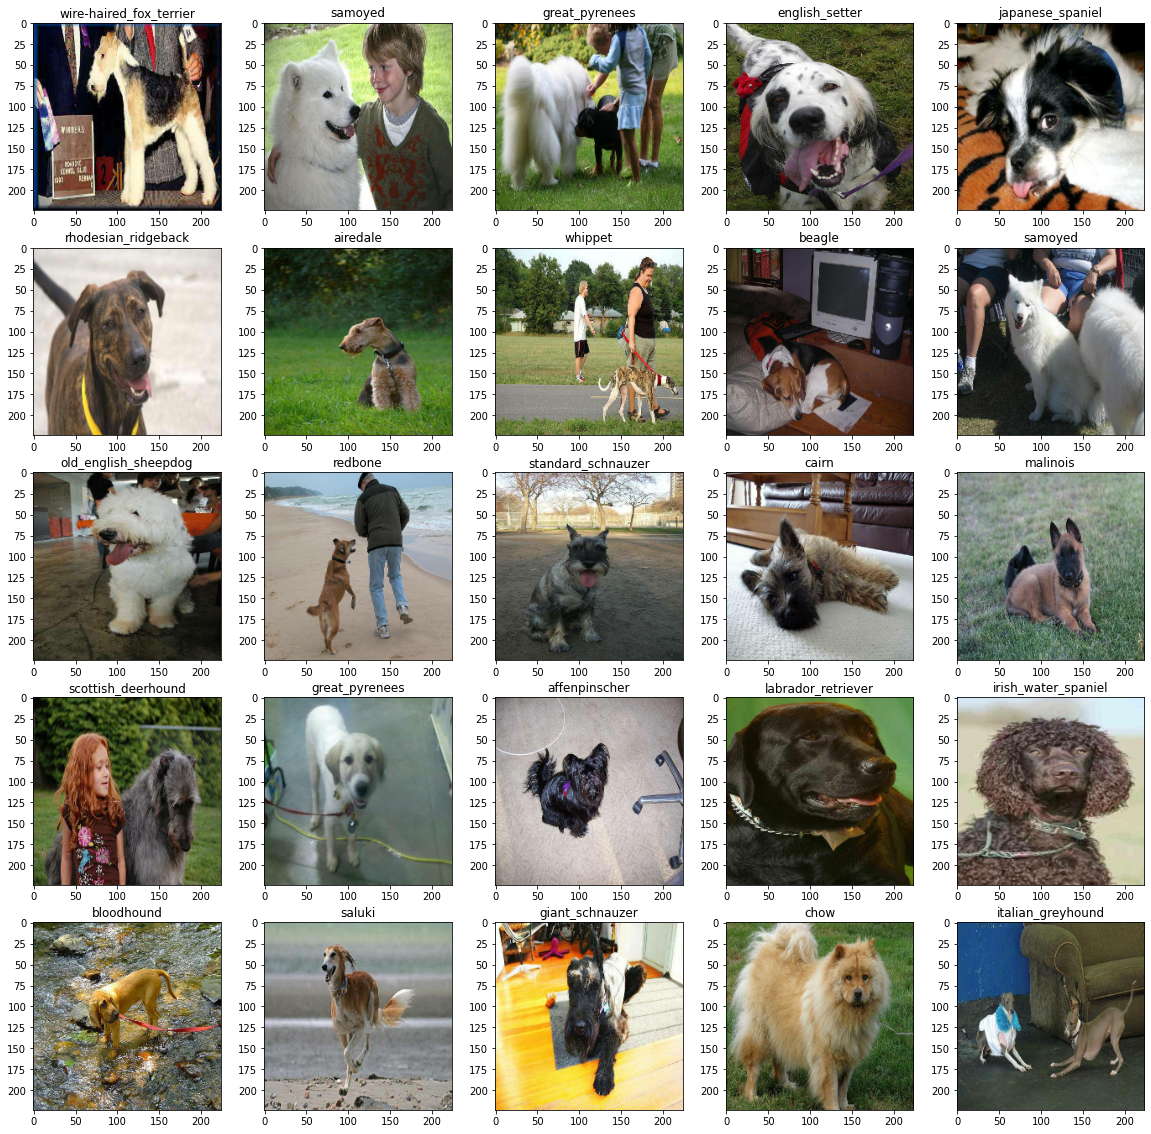

In [31]:
train_images,train_labels=next(train_data.as_numpy_iterator())
len(train_images),len(train_labels)
show25_images(train_images,train_labels)

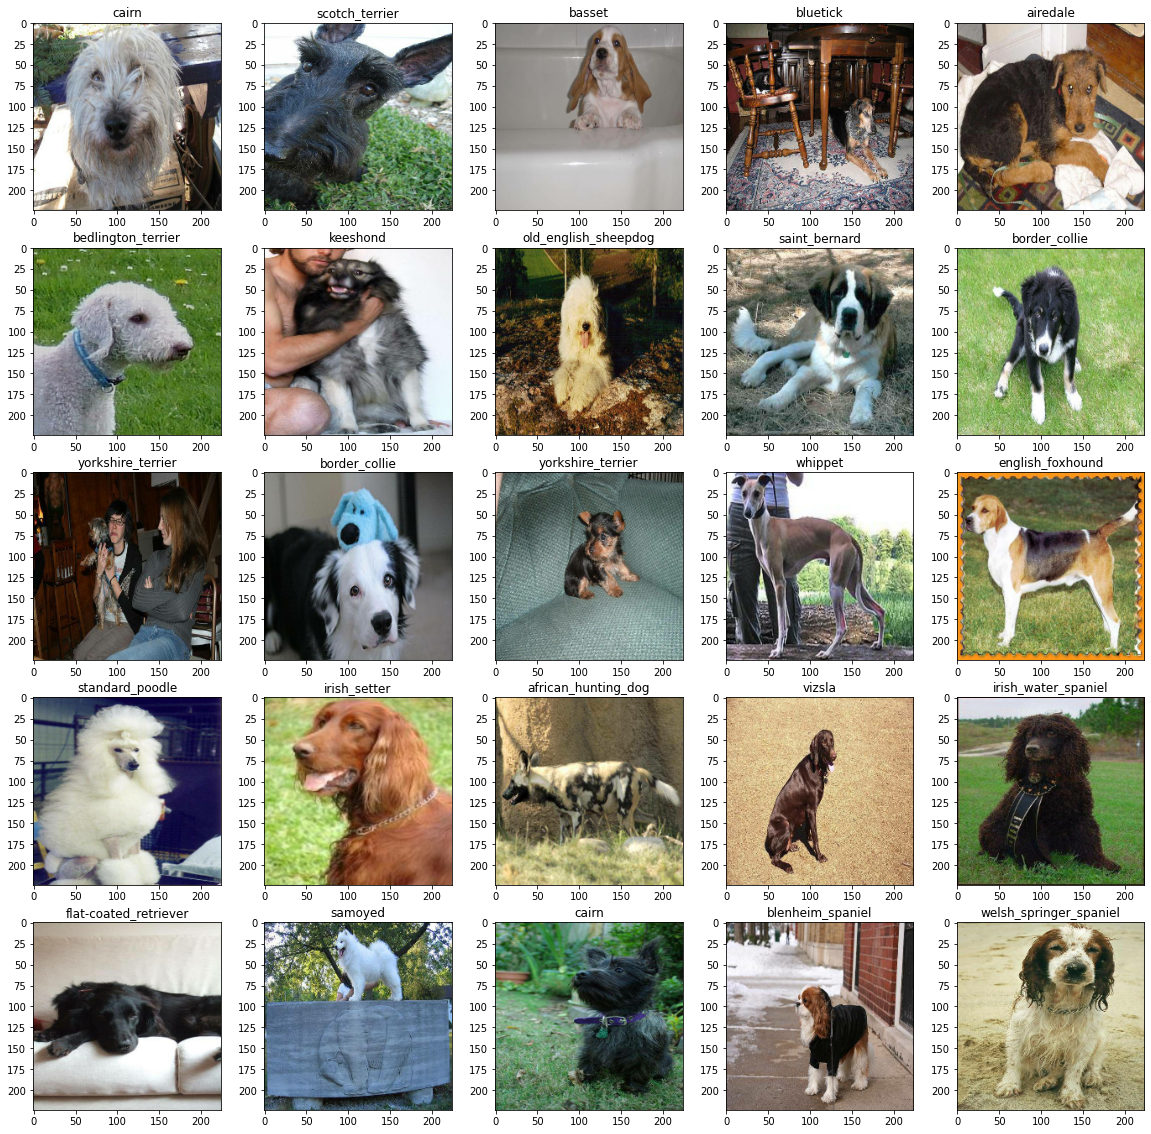

In [32]:
test_images,test_labels = next(test_data.as_numpy_iterator())
show25_images(test_images,test_labels)

In [33]:
len(unique_breeds)

120

In [34]:
input_shape = [None,Img_Size,Img_Size,3] # batch, height, width, colour channels
output_shape = len(unique_breeds)
model_url = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"

In [35]:
# Creates a function which builds a keras model
def create_model(input_shape=input_shape,output_shape=output_shape,model_url=model_url):
    print("Building model with:",model_url)
    
    #setup the model layer
    model = tf.keras.Sequential([
        hub.KerasLayer(model_url), # Layer 1 (Input Layer)
        tf.keras.layers.Dense(units=output_shape,activation="softmax") # Layer 2 (Output Layer)
    ])
    print("model done")
    # Compile the model 
    model.compile(
        loss=tf.keras.losses.CategoricalCrossentropy(),
        optimizer=tf.keras.optimizers.Adam(),
        metrics=["accuracy"]
    )
    print("model compiled")
    # Build the model
    model.build(input_shape)
    
    return model

In [36]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
model done
model compiled
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              5432713   
_________________________________________________________________
dense (Dense)                (None, 120)               120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


In [37]:
outputs = np.ones(shape=(1,1,1280))
outputs

array([[[1., 1., 1., ..., 1., 1., 1.]]])

# Creating callbacks

In [38]:
# Load TensorBoard notebook extension
%load_ext tensorboard

In [39]:
import datatime

def create_tensorboard_calllback():
    

SyntaxError: unexpected EOF while parsing (3109219435.py, line 4)